In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
%matplotlib inline

In [2]:
def profile(alpha=0.53, b=3.3, q=0.92):
    """
    This definition comes from Noeske et al 2003:
    
    New insights to the photometric structure of Blue Compact Dwarf
    galaxies from deep Near-Infrared studies
    I. Observations, surface photometry and decomposition
    of surface brightness profiles.
    
    Default parameters correspond to Tol 1214-277 in the J-band.
    
    Profile corresponds to Eq (6) and Eq. (7)
    
    Alpha comes in kpc.
    """
    r = np.linspace(0.0, alpha*10.0, 100)
    I = np.exp(-r/alpha)
    P = (r/(b*alpha))**3 + (r/alpha * (1.0-q)/q)
    I = I * (1.0 - q*np.exp(-P))
    I_int = integrate.cumtrapz(I*r,r, initial=0) # integrate total I = \int I r dr.
    return r, I/I_int[-1]

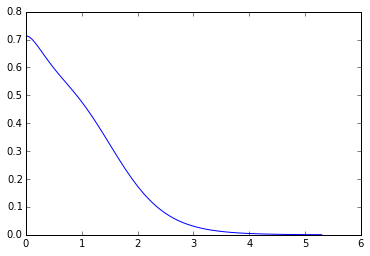

In [3]:
r, I = profile()
plt.plot(r,I)

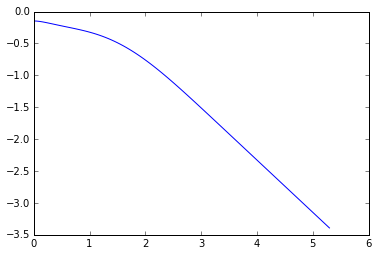

In [5]:
plt.plot(r,np.log10(I))

In [6]:
I_int = integrate.cumtrapz(I*r,r, initial=0)

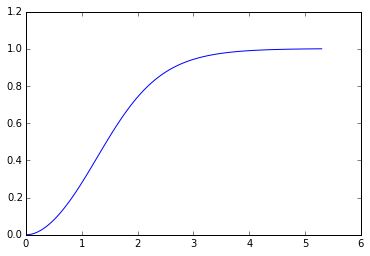

In [7]:
plt.plot(r,I_int)

In [8]:
#this is the radius tha containts half of the total luminosity
id_half = np.argmin(np.abs(I_int - 0.5))
R_half = r[id_half]
print  R_half

1.44545454545


In [9]:
L = 9.43E8 #UV bol lumgalex # 8.9E8 in V band
alpha = 0.53 # kpc scale radius from noeske
R = R_half  # half light radius from integrated lum profile
I = L/(4.0* np.pi * R * 1E3 * R * 1E3) # in Lsun/pc^2
print 'R {}'.format(R)
print 'log I {}'.format(np.log10(I))
print 'log R {}'.format(np.log10(R))
print 'log L {}'.format(np.log10(L))
log_sigma = (np.log10(I) + 1.21*np.log10(R)-0.55)/1.6
sigma = 10**(log_sigma)
M_dyn = 1.16E9 * (sigma/100.0)**2 * R
print 'log sigma {}'.format(log_sigma)
print 'sigma {}'.format(sigma)
print 'log10 Mdyn {}'.format(np.log10(M_dyn))


R 1.44545454545
log I 1.55529295039
log R 0.160004439162
log L 8.97451169274
log sigma 0.749311451111
sigma 5.6145047179
log10 Mdyn 6.72308533061
